# Presentación de la empresa, organización o problema específico  

#### De acuerdo a la Organización Mundial de la Salud (OMS), ACV es la segunda causa de muerte a nivel global, responsable de aproximadamente 11% de las muertes totales.
#### Este set de datos es utilizado para predecir si un paciente es propenso a tener un ACV basado en los parametros como género, edad, enfermedades varias, y estado de fumador. Cada fila en los datos provee información relevante sobre el paciente.


#### Preguntas y objetivos de la investigación.

.¿Cuál es el género más propenso a tener un acv?  
.¿Cuál es el grado de influencia de ser fumador?  
.¿Existe relación entre el índice de masa corporal y el nivel de glucosa para contraer un acv?  
.¿Qué tanto influye el tipo de trabajo en la posibilidad de tener un acv?  
.¿Aumentan las probabilidades de tener un acv a mayor edad?    
.¿Tener hipertensión influye a la hora de tener un acv?  // Se cambió la pregunta en base a la corrección de Maxi, no tenemos niveles de hipertensión, sólo veradero o falso
.¿Tiene relación el estado marital con tener un acv?  


El objetivo de la investigación es determinar cuales son las variables mas influyentes a la hora de provocar un acv. Utilizando un modelo de predicción vamos a poder determinar si una persona es mas propensa a tener un acv.





#### 3. Conformación del equipo de trabajo. 
Martin Marino  
Leandro Bruzzo  

# Indicación de la fuente del dataset y los criterios de selección (Data Acquisition)
#### El dataset fue obtenido de la plataforma Kaggle desde el siguiente link : https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

#### Información sobre el data set:
- Creador: fedesoriano - https://www.kaggle.com/fedesoriano

- Información de los atributos: 
1) id: identificador único  
2) gender: "Male", "Female" o "Other" (Masculino, Femenino u Otro)  
3) age: Edad del paciente  
4) hypertension: 0 si el paciente no tiene hipertensión , 1 si el paciente tiene hipertensión  
5) heart_disease: 0 si el paciente no tiene enfermedades del corazón, 1 si el paciente tiene enfermedades del corazón  
6) ever_married: "No" o "Yes" (No o Sí)  
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed" (Niño, trabajo en el sector público, nunca trabajó, privado o monotributista)  
8) Residence_type: "Rural" or "Urban"   
9) avg_glucose_level: nivel promedio de glucosa en la sangre  
10) bmi: Índice de masa corporal  
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"* (Fumador frecuente, nunca fumó, fuma, desconocido)  
12) stroke: 1 si el paciente tuvo un ACV 0 si no lo tuvo (Variable Target)  
*Nota: 'Uknown' en smoking_status indica que no se registró un estado del paciente.

Información sobre Kaggle:
Kaggle, una subsidiaria de Google LLC, es una comunidad en línea de científicos de datos y profesionales del aprendizaje automático.

In [515]:
#Librerías neceasrias para el correcto funcionamiento del jupyter (descomentar para ejecutar por primera vez y luego volver a comentarlo)

# import sys
# !{sys.executable} -m pip install --upgrade pip
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install numpy
# !{sys.executable} -m pip install seaborn
# !{sys.executable} -m pip install matplotlib
# !{sys.executable} -m pip install pandas_profiling
# !{sys.executable} -m pip install plotly.express
# !{sys.executable} -m pip install ipywidgets
# !{sys.executable} -m pip install nbformat
# !{sys.executable} -m pip install sklearn

#### Importamos todas las librerias de visualización, modelos de ML y validación

In [516]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling
import plotly.express as px

from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import roc_curve

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report

In [517]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [518]:
df.shape

(5110, 12)

In [519]:
#Creamos un dataframe con las columnas work_type y residence_type en booleano (Es decir, 0 y 1) para ser utilizados en la matriz de correlación

df.rename(columns = {'Residence_type':'residence_type'}, inplace = True)
df_2 = df #Realizamos una copia del dataframe original para la matriz de correlación
#Reemplazamos los valores Yes y No de ever_married con 1 y 0
df_2['ever_married'].replace(
                to_replace=['Yes', 'No'], 
                value=[1,0,], 
                inplace=True, 
)
df_2['residence_type'].replace(
                to_replace=['Urban', 'Rural'], 
                value=[0,1,], 
                inplace=True, 
)

df_2

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,1,Private,0,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,1,Self-employed,1,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,1,Private,1,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,1,Private,0,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,1,Self-employed,1,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,1,Private,0,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,1,Self-employed,0,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,1,Self-employed,1,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,1,Private,1,166.29,25.6,formerly smoked,0


In [520]:
df_2.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
ever_married,5110.0,0.656164,0.475034,0.00,0.000,1.000,1.00,1.00
residence_type,5110.0,0.491977,0.499985,0.00,0.000,0.000,1.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


#### EDA Utilizando la librería pandas_profiling

In [521]:
df_2.profile_report(title='Data Profiling')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### Con el siguiente gráfico de torta podemos observar el gran desbalanceo de nuestro set de datos. Esto será crucial a la hora de preparar nuestros algoritmos, ya que un desbalance tan marcado puede ocasionar una gran pérdida de precisión y será necesario el uso de técnicas específicas para tratar dicho desbalanceo.


In [522]:
df_pie = df.copy()
df_pie['stroke'].replace(
                to_replace=[0, 1], 
                value=["No","Yes"], 
                inplace=True)
fig = px.pie(df_pie, names="stroke",values='id', hole=.35, title='Stroke Distribution')
fig.show()

In [523]:
df.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

#### Filtros y limpieza del dataset a utilizar para los modelos de ML

In [524]:
#Vemos los valores unicos para la columna de smoking status y posteriormente excluimos los desconocidos
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

#### En smoking_status se puede observar que tenemos valores "Unknown", se realizará un conteo de los mismos para observar el impacto de su eliminación, ya que dicho estado no nos aporta nada en el análisis.

In [525]:
df.smoking_status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

#### Unknown tiene una cantidad de registros de 1544, aproximadamente el 30% de los datos. Debido a que no podemos asumir si esa persona fuma o no, se tomará la decisión de eliminarlos. 

In [526]:
#Eliminar los datos unknown de la columna smoking_status

df['smoking_status'].values
df = df[df.smoking_status != 'Unknown']
df.smoking_status.value_counts()

never smoked       1892
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

#### BMI tiene 140 valores nulos, los mismos podrían ser eliminados pero debido a que el dataset perdió gran cantidad de datos al eliminar los registros con smoking_status = Unknown, se precederá a utilizar un promedio para los mismos.


In [527]:
for i in df.columns[df.isnull().any(axis=0)]:   
    df[i].fillna(df[i].mean(),inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3566 entries, 0 to 5108
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 3566 non-null   int64  
 1   gender             3566 non-null   object 
 2   age                3566 non-null   float64
 3   hypertension       3566 non-null   int64  
 4   heart_disease      3566 non-null   int64  
 5   ever_married       3566 non-null   int64  
 6   work_type          3566 non-null   object 
 7   residence_type     3566 non-null   int64  
 8   avg_glucose_level  3566 non-null   float64
 9   bmi                3566 non-null   float64
 10  smoking_status     3566 non-null   object 
 11  stroke             3566 non-null   int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 362.2+ KB


C:\Users\Martin\AppData\Local\Temp\ipykernel_8712\1231436049.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Como se pudo observar en la línea anterior, se han completados los valores NaN de la columna BMI con el valor promedio de los mismos

#### En la columna gender podemos observar que hay un único registro con el género other, por motivos de espacio de memoria el mismo será eliminado ya que al preparar el dataset para utilizar algoritmos de clasificación empleando data dummies, se creará una columna extra en consecuencia de este único valor.
#### Además, el análisis estará centrado en los dos géneros dominantes del data set, ya que a mayor cantidad de género será menos preciso a determinarlos.

In [528]:
df.gender.value_counts()

Female    2158
Male      1407
Other        1
Name: gender, dtype: int64

In [529]:
df = df[df.gender != 'Other']
df.gender.value_counts()

Female    2158
Male      1407
Name: gender, dtype: int64

#### Hay que tener en consideración la pérdida de datos, hemos pasado de 5110 registros a 3566. Sin embargo, estos datos siguen siendo válidos, más limpios y pueden ser utilizados para el modelo de ML. 

#### Llegado a este punto, el data set pasa a estar a un estado mucho más útil, limpio y con mayor facilidad para su manipulación.  
#### Comenzaremos con el EDA para obtener respuestas, patrones y entender mejor los datos

#### Emplearemos el uso de un mapa de correlación

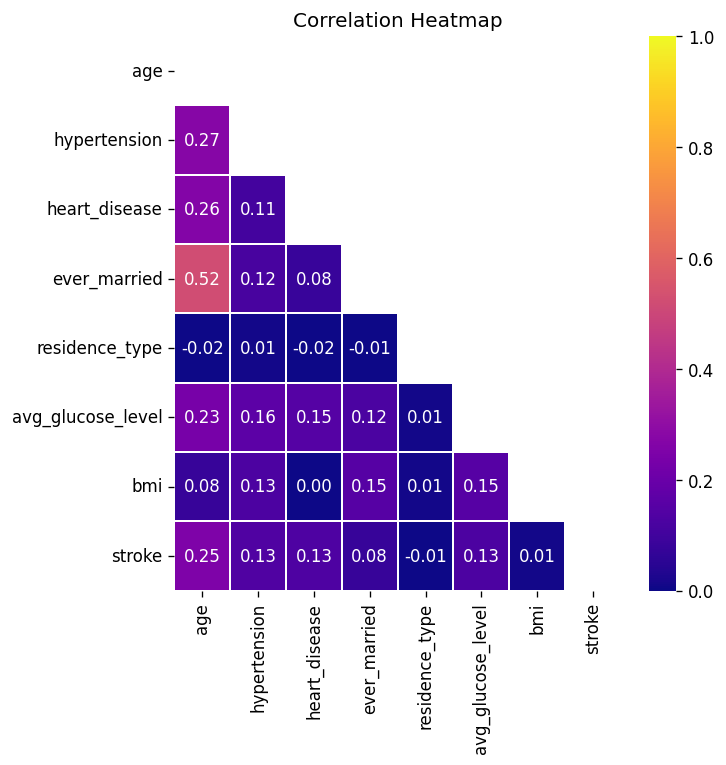

In [530]:
#Creamos un df sin la columna id para ser utizado en el mapa de correlación, ya que el mismo es un identificador único.
dfHeatmap = df.drop(columns=['id'])
plt.figure(dpi = 120,figsize= (6,6))
mask = np.triu(np.ones_like(dfHeatmap.corr(),dtype = bool))
sns.heatmap(dfHeatmap.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma', vmax=1, vmin=0)
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()


Se ha decidido descartar la columna residence_type, ya que esta no presenta un impacto en el dataset ni correlaciones positivas y/o negativas de forma significante. (-0,02 como el mayor coeficiente)

In [531]:
#Eliminamos la columna residence_type antes de seguir analizando en profundida el dataset.
df.drop(['residence_type'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3565 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 3565 non-null   int64  
 1   gender             3565 non-null   object 
 2   age                3565 non-null   float64
 3   hypertension       3565 non-null   int64  
 4   heart_disease      3565 non-null   int64  
 5   ever_married       3565 non-null   int64  
 6   work_type          3565 non-null   object 
 7   avg_glucose_level  3565 non-null   float64
 8   bmi                3565 non-null   float64
 9   smoking_status     3565 non-null   object 
 10  stroke             3565 non-null   int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 334.2+ KB


Se ha decidido eliminar la columna ever_married, ya que si bien es la variable más correlacionada con age, esta sólo nos demuestra que a mayor edad, la gente es más propensa a estar casada. Este dato no nos aporta valor para el objetivo al que queremos llegar. Además, se han hecho pruebas con los modelos y este valor no tiene influencia en el rendimiento de los mismos.

In [532]:
df.drop(['ever_married'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3565 entries, 0 to 5108
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 3565 non-null   int64  
 1   gender             3565 non-null   object 
 2   age                3565 non-null   float64
 3   hypertension       3565 non-null   int64  
 4   heart_disease      3565 non-null   int64  
 5   work_type          3565 non-null   object 
 6   avg_glucose_level  3565 non-null   float64
 7   bmi                3565 non-null   float64
 8   smoking_status     3565 non-null   object 
 9   stroke             3565 non-null   int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 306.4+ KB


#### Observaremos la distribución de estado de fumador en base a la edad y como esta influye a la hora de padecer un ACV

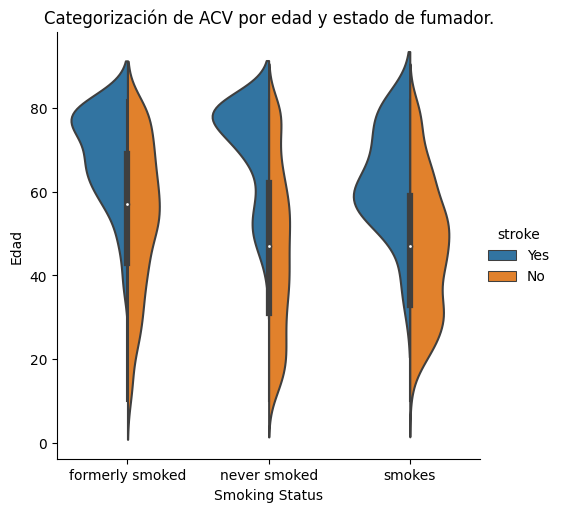

In [533]:
df_smoking = df[(df['smoking_status']) != 'Unknown']
df_smoking2 = df.copy()
df_smoking2['stroke'].replace(
                to_replace=[0, 1], 
                value=["No","Yes"], 
                inplace=True)
ax = sns.catplot(data=df_smoking2, kind='violin', x='smoking_status', y='age',   hue='stroke', split=True)
ax.set(xlabel='Smoking Status', ylabel='Edad', title='Categorización de ACV por edad y estado de fumador.')
plt.show()

#### A continuación realizaremos gráficos de boxplot para todas las columnas, con el fin de observar con mayor detalle la distribución de valores junto a la presencia (o no) de outliers.

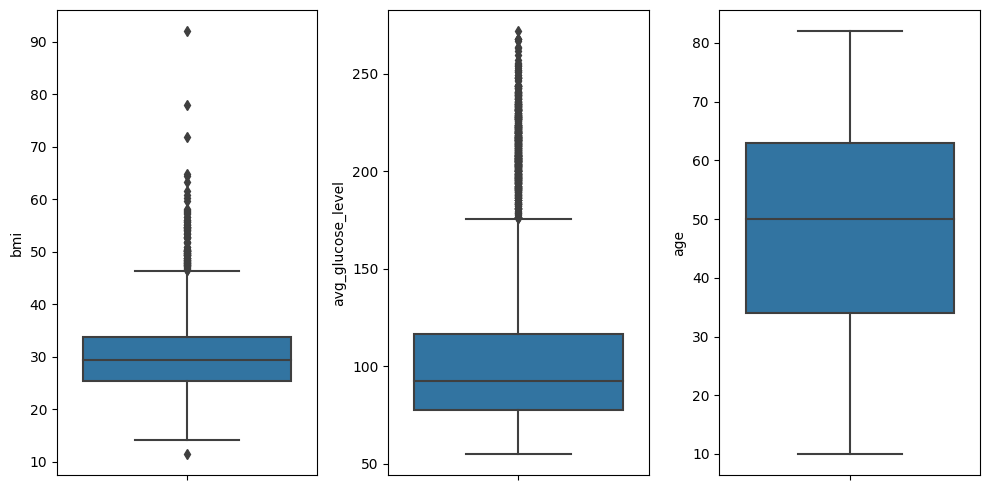

In [534]:
variables = ['bmi', 'avg_glucose_level', 'age']

fig, axes = plt.subplots(1, len(variables), figsize=(10,5))

for ax, variable in zip(axes, variables):
    ax = sns.boxplot( y=variable, data=df, ax=ax)
plt.tight_layout()

plt.show()

#### En los gráficos de boxplot se pueden observar una gran presencia de outliers (valores atípicos), estos se mantendrán en el dataset ya que en este caso en particular, no presenta un problema, siendo que son valores válidos y representan la gran cantidad de datos. Eliminarlos reduciría la utilidad del dataset de forma drástica

#### Aplicación de modelos de ML

#### Una vez realizado los diferentes tipos de análisis y limpieza de datos necesaria, es momento de aplicar algoritmos.

In [535]:
#Creamos un data dummie para obtener las variables categóricas como booleanas (es decir 0,1)
df_dummy = pd.get_dummies(df, drop_first=True)
df_dummy = df_dummy.drop('id', axis=1)
df_dummy    

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,1,0,1,0,0,0,0
1,61.0,0,0,202.21,30.290047,1,0,0,0,1,0,1,0
2,80.0,0,1,105.92,32.500000,1,1,0,1,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.000000,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5102,57.0,0,0,77.93,21.700000,0,0,0,1,0,0,1,0
5105,80.0,1,0,83.75,30.290047,0,0,0,1,0,0,1,0
5106,81.0,0,0,125.20,40.000000,0,0,0,0,1,0,1,0
5107,35.0,0,0,82.99,30.600000,0,0,0,0,1,0,1,0


In [536]:
#Separamos los datos de entrada de la salida
X = df_dummy.drop('stroke', axis=1) #Elimino de mi dataset la variable a predecir
y = df_dummy.stroke #Defino el Target

In [537]:
#Seteamos los valores para separar el testeo del train, un 20% para testear y 80% para entrenamiento.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) 

##### Como primer algoritmo, nos decantaremos por la regresión logística binaria en base a su naturaleza de predecir la probabilidad de una variable categórica. (En este caso, 1 sí es propenso a tener un ACV; 0 si no)

In [538]:
logreg = LogisticRegression(class_weight="balanced", random_state=42, solver="liblinear")
logreg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=42, solver='liblinear')

In [539]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.74


c:\Users\Martin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



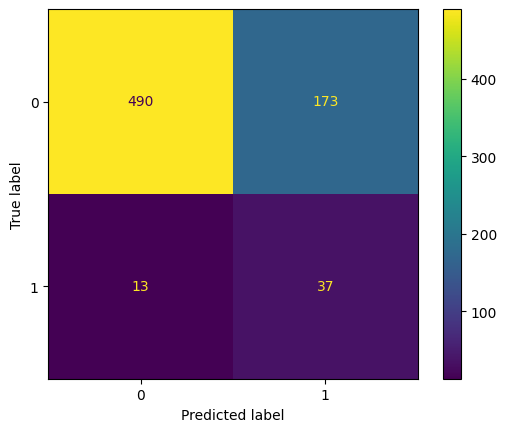

In [540]:
plot_confusion_matrix(logreg, X_test, y_test)

plt.show()

In [541]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.74      0.84       663
           1       0.18      0.74      0.28        50

    accuracy                           0.74       713
   macro avg       0.58      0.74      0.56       713
weighted avg       0.92      0.74      0.80       713



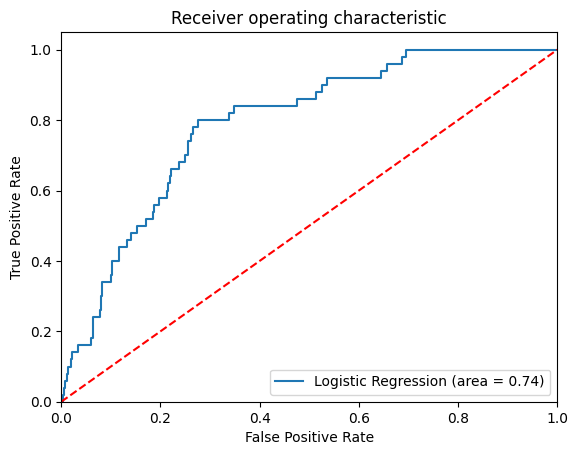

In [542]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#### Para continuar, el segundo algoritmo que utilizaremos sera el DecisionTreeClassifier (Arbol de decisión)

In [543]:
tree = DecisionTreeClassifier(random_state = 42) #Creamos el modelo

#### Se agregó el hiperparámetro class_weight="balanced" para ayudar al algoritmo DecisionTree a trabajar con un set de datos desbalanceado.

In [544]:
param_dict = {
    "criterion":['gini','entropy'],
    "max_depth":range(1,10),
    "min_samples_split":range(2,10),
    "min_samples_leaf":range(1,5),
    "class_weight":['balanced']
}

In [545]:
grid = GridSearchCV(tree,
                    param_grid=param_dict,
                    cv=3,
                    verbose=1,
                    n_jobs=1,
                    scoring="recall")
grid.fit(X_train, y_train)

Fitting 3 folds for each of 576 candidates, totalling 1728 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42), n_jobs=1,
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(2, 10)},
             scoring='recall', verbose=1)

In [546]:
grid.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [547]:
grid.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=3, random_state=42)

In [548]:
grid.best_score_

0.8287581699346406

In [549]:
y_train_pred = grid.predict(X_train) #Prediccion en Train
y_test_pred = grid.predict(X_test) #Prediccion en Test

AUC for our classifier is: 0.7474509803921568


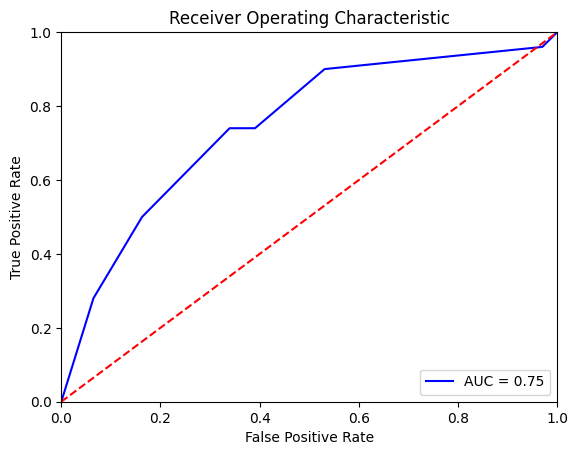

In [550]:
class_probabilities = grid.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

c:\Users\Martin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



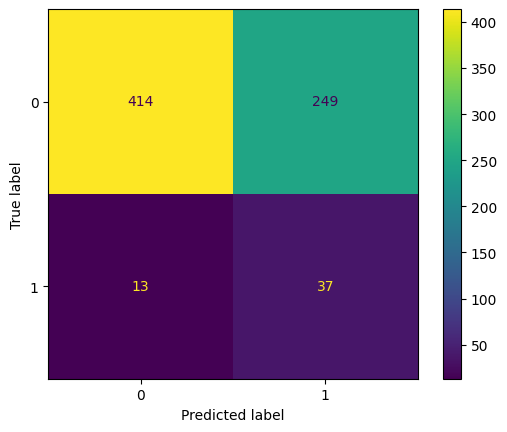

In [551]:
#Matriz de confusión para evaluar el desempeño del algoritmo
# confusion_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(grid, X_test, y_test)

plt.show()

In [552]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.62      0.76       663
           1       0.13      0.74      0.22        50

    accuracy                           0.63       713
   macro avg       0.55      0.68      0.49       713
weighted avg       0.91      0.63      0.72       713



#### Además del algoritmo DecisionTree, aplicaremos KNeighborsClassifier y Random Forest para ver su efectividad.

In [553]:
#Creamos nuestro objeto KNN
knn = KNeighborsClassifier()

#### Recurriremos al uso de GridSearchCV para obtener la mejor configuración de hiper parámetros.

In [554]:
#Definicion de Hyperparámetros
param_grid = {'n_neighbors':np.arange(1, 10),
              'weights': ['uniform', 'distance'], 
              'leaf_size':[1,3,5,7,10],
              'algorithm':['auto', 'kd_tree']}

#Utilizamos la grilla definida anteriormente...
model = GridSearchCV(knn, param_grid=param_grid, cv=3,scoring="recall")

In [555]:
model.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'kd_tree'],
                         'leaf_size': [1, 3, 5, 7, 10],
                         'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'weights': ['uniform', 'distance']},
             scoring='recall')

In [556]:
print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

Mejores parametros: {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 1, 'weights': 'uniform'}
Mejor Score: 0.1511111111111111



In [557]:
scores = pd.DataFrame(model.cv_results_)
scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_leaf_size,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011335,4.719324e-04,0.037676,2.054811e-03,auto,1,1,uniform,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh...",0.176471,0.156863,0.12,0.151111,0.023410,1
1,0.011002,1.123916e-07,0.009002,1.946680e-07,auto,1,1,distance,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh...",0.176471,0.156863,0.12,0.151111,0.023410,1
2,0.011335,4.713142e-04,0.046344,1.108810e-02,auto,1,2,uniform,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh...",0.019608,0.019608,0.04,0.026405,0.009613,101
3,0.016671,1.700033e-03,0.016670,1.699753e-03,auto,1,2,distance,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh...",0.176471,0.156863,0.12,0.151111,0.023410,1
4,0.012669,1.699908e-03,0.041009,8.169241e-04,auto,1,3,uniform,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh...",0.117647,0.039216,0.04,0.065621,0.036789,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.008668,4.715952e-04,0.009669,4.713704e-04,kd_tree,10,7,distance,"{'algorithm': 'kd_tree', 'leaf_size': 10, 'n_n...",0.058824,0.039216,0.04,0.046013,0.009064,71
176,0.008335,4.717637e-04,0.040009,3.560086e-03,kd_tree,10,8,uniform,"{'algorithm': 'kd_tree', 'leaf_size': 10, 'n_n...",0.000000,0.000000,0.00,0.000000,0.000000,171
177,0.008002,3.371748e-07,0.010003,2.247832e-07,kd_tree,10,8,distance,"{'algorithm': 'kd_tree', 'leaf_size': 10, 'n_n...",0.019608,0.019608,0.02,0.019739,0.000185,121
178,0.008001,7.370010e-07,0.036008,8.162427e-04,kd_tree,10,9,uniform,"{'algorithm': 'kd_tree', 'leaf_size': 10, 'n_n...",0.000000,0.019608,0.02,0.013203,0.009337,151


In [558]:
prediction = model.predict(X_test)

In [559]:
#Accuracy
print('Recall:', recall_score(y_test, prediction))

Recall: 0.08


AUC for our classifier is: 0.5324585218702866


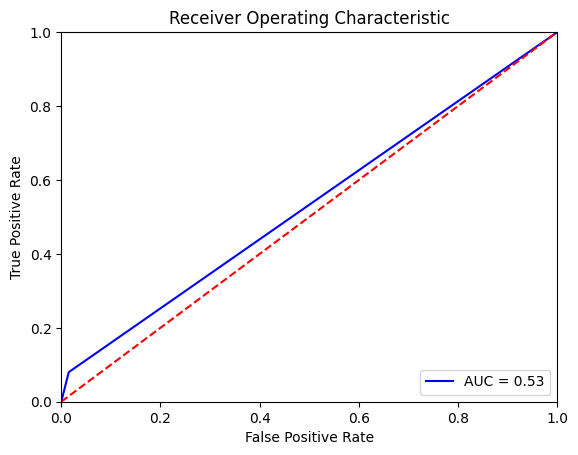

In [560]:
class_probabilities = model.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [570]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       663
           1       0.29      0.08      0.12        50

    accuracy                           0.92       713
   macro avg       0.61      0.53      0.54       713
weighted avg       0.89      0.92      0.90       713



c:\Users\Martin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



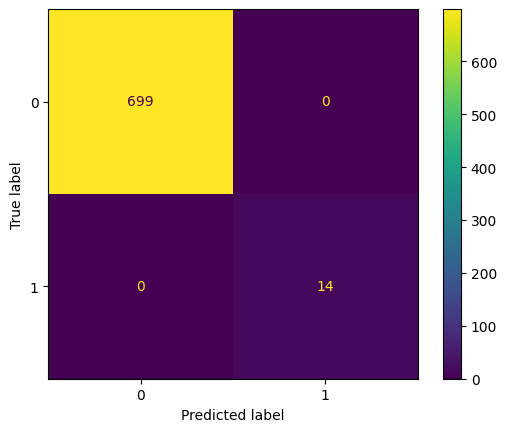

In [572]:
plot_confusion_matrix(model, X_test, prediction)

plt.show()

In [563]:
#Creamos un random forest!
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy'],
    'class_weight':["balanced"]
}


In [564]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 3, scoring='recall')
CV_rfc.fit(X_train, y_train)    

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'n_estimators': [200, 500]},
             scoring='recall')

In [565]:
CV_rfc.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 4,
 'n_estimators': 200}

In [566]:
y_test_pred = CV_rfc.predict(X_test) #Prediccion en Test

AUC for our classifier is: 0.7949924585218703


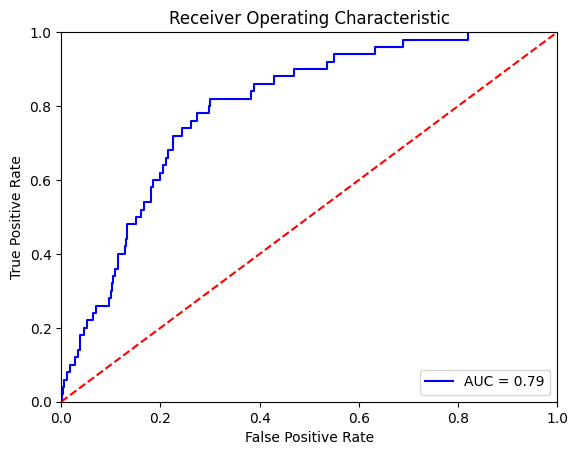

In [567]:
class_probabilities = CV_rfc.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [568]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.75      0.85       663
           1       0.18      0.74      0.29        50

    accuracy                           0.75       713
   macro avg       0.58      0.74      0.57       713
weighted avg       0.92      0.75      0.81       713



c:\Users\Martin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



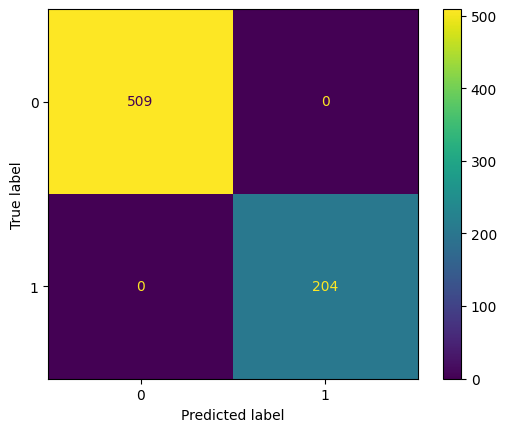

In [569]:
#Matriz de confusión para evaluar el desempeño del algoritmo RANDOM FOREST
plot_confusion_matrix(CV_rfc, X_test, y_test_pred)
plt.show()